(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


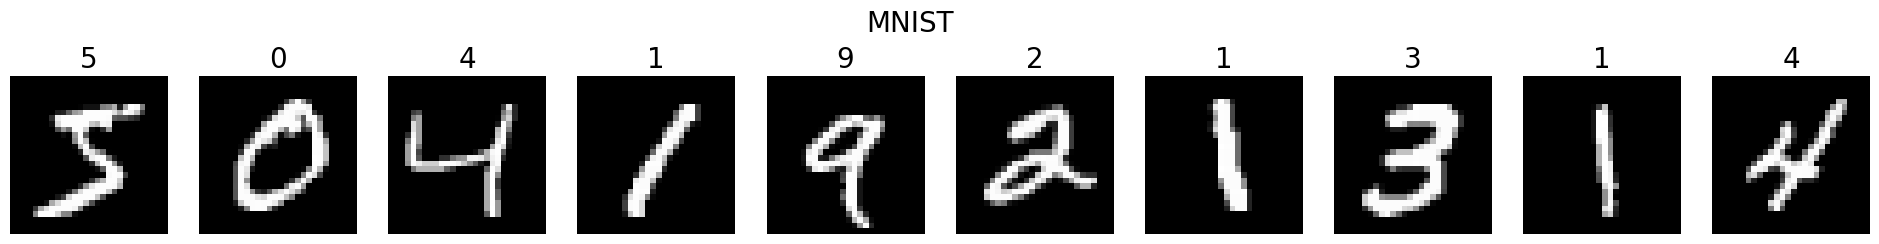

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


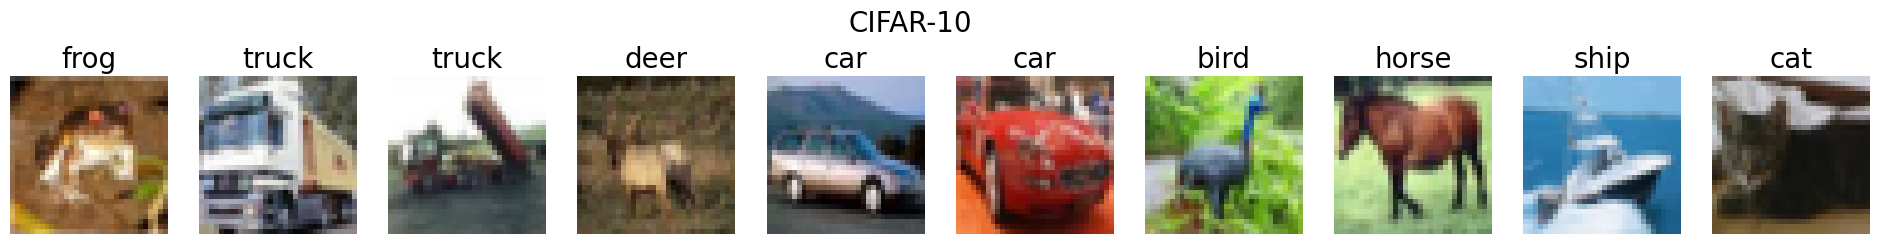

In [8]:
# 텐서플로로 데이터 확인하기
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
plt.figure(figsize=(24, 3))
plt.suptitle('MNIST', fontsize=20)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]), fontsize=20)
plt.show()

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(24, 3))
plt.suptitle('CIFAR-10', fontsize=20)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=20)
plt.show()

In [9]:
# 다층 퍼셉트론으로 MNIST 인식하기(SGD 옵티마이저)
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 784).astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

mlp = Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

mlp.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
mlp.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=2)   # verbose=2: 진행상황 출력

res = mlp.evaluate(x_test, y_test, verbose=0)       # verbose=0: 결과만 출력
print('Accuracy =', res[1]*100)

Epoch 1/50
469/469 - 2s - loss: 0.0915 - accuracy: 0.1016 - val_loss: 0.0890 - val_accuracy: 0.1631 - 2s/epoch - 5ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0867 - accuracy: 0.2286 - val_loss: 0.0835 - val_accuracy: 0.3177 - 2s/epoch - 3ms/step
Epoch 3/50
469/469 - 1s - loss: 0.0806 - accuracy: 0.3885 - val_loss: 0.0766 - val_accuracy: 0.4645 - 1s/epoch - 3ms/step
Epoch 4/50
469/469 - 1s - loss: 0.0735 - accuracy: 0.5037 - val_loss: 0.0693 - val_accuracy: 0.5590 - 1s/epoch - 3ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0663 - accuracy: 0.5975 - val_loss: 0.0621 - val_accuracy: 0.6419 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0596 - accuracy: 0.6628 - val_loss: 0.0558 - val_accuracy: 0.6990 - 2s/epoch - 3ms/step
Epoch 7/50
469/469 - 1s - loss: 0.0539 - accuracy: 0.7048 - val_loss: 0.0505 - val_accuracy: 0.7318 - 1s/epoch - 3ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0491 - accuracy: 0.7328 - val_loss: 0.0461 - val_accuracy: 0.7579 - 2s/epoch - 3ms/step
Epoch 9/50
469/469 - 2s 

In [15]:
# 다층 퍼셉트론으로 MNIST 인식하기(Adam 옵티마이저)
#import numpy as np
#import tensorflow as tf
#import tensorflow.keras.datasets as ds

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

mlp = Sequential()
mlp.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp.add(Dense(units=10, activation='softmax'))

mlp.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
mlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

res = mlp.evaluate(x_test, y_test, verbose=0)
print('Accuracy =', res[1]*100)

Epoch 1/50
469/469 - 3s - loss: 0.0146 - accuracy: 0.9039 - val_loss: 0.0106 - val_accuracy: 0.9318 - 3s/epoch - 7ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0089 - accuracy: 0.9428 - val_loss: 0.0074 - val_accuracy: 0.9511 - 3s/epoch - 6ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0065 - accuracy: 0.9590 - val_loss: 0.0062 - val_accuracy: 0.9601 - 3s/epoch - 5ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0050 - accuracy: 0.9683 - val_loss: 0.0050 - val_accuracy: 0.9661 - 3s/epoch - 6ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0040 - accuracy: 0.9752 - val_loss: 0.0046 - val_accuracy: 0.9707 - 3s/epoch - 6ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0034 - accuracy: 0.9798 - val_loss: 0.0042 - val_accuracy: 0.9729 - 3s/epoch - 6ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0028 - accuracy: 0.9841 - val_loss: 0.0038 - val_accuracy: 0.9741 - 3s/epoch - 6ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0024 - accuracy: 0.9858 - val_loss: 0.0035 - val_accuracy: 0.9765 - 3s/epoch - 5ms/step
Epoch 9/50
469/469 - 3s 

Epoch 1/50
469/469 - 3s - loss: 0.0880 - accuracy: 0.1824 - val_loss: 0.0844 - val_accuracy: 0.2904 - 3s/epoch - 6ms/step
Epoch 2/50
469/469 - 2s - loss: 0.0806 - accuracy: 0.4077 - val_loss: 0.0765 - val_accuracy: 0.4844 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 1s - loss: 0.0728 - accuracy: 0.5350 - val_loss: 0.0685 - val_accuracy: 0.5879 - 1s/epoch - 3ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0652 - accuracy: 0.6249 - val_loss: 0.0611 - val_accuracy: 0.6711 - 2s/epoch - 3ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0585 - accuracy: 0.6874 - val_loss: 0.0548 - val_accuracy: 0.7160 - 2s/epoch - 3ms/step
Epoch 6/50
469/469 - 1s - loss: 0.0529 - accuracy: 0.7218 - val_loss: 0.0497 - val_accuracy: 0.7433 - 1s/epoch - 3ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0484 - accuracy: 0.7406 - val_loss: 0.0457 - val_accuracy: 0.7572 - 2s/epoch - 3ms/step
Epoch 8/50
469/469 - 1s - loss: 0.0449 - accuracy: 0.7537 - val_loss: 0.0425 - val_accuracy: 0.7669 - 1s/epoch - 3ms/step
Epoch 9/50
469/469 - 1s 

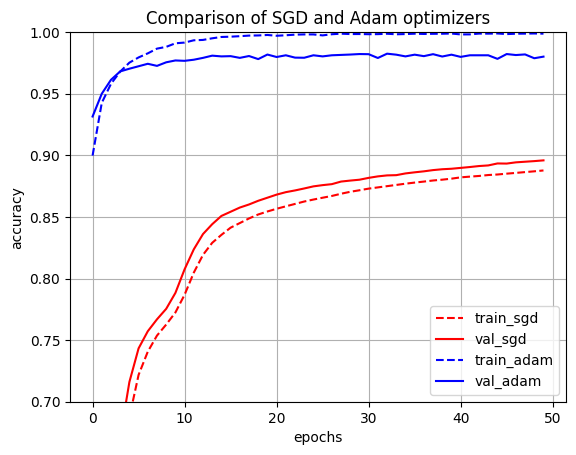

In [16]:
# 다층 퍼셉트론으로 MNIST 인식하기(SGD와 Adam의 성능 그래프 비교)
#import numpy as np
#import tensorflow as tf
#import tensorflow.keras.datasets as ds

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import SGD, Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_sgd.add(Dense(units=10, activation='softmax'))

mlp_sgd.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
hist_sgd = mlp_sgd.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('SGD Accuracy =', mlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)

mlp_adam = Sequential()
mlp_adam.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_adam.add(Dense(units=10, activation='softmax'))

mlp_adam.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_adam = mlp_adam.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('Adam Accuracy =', mlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()

Epoch 1/20
469/469 - 3s - loss: 0.3978 - accuracy: 0.8966 - val_loss: 0.1758 - val_accuracy: 0.9494 - 3s/epoch - 5ms/step
Epoch 2/20
469/469 - 2s - loss: 0.1442 - accuracy: 0.9584 - val_loss: 0.1183 - val_accuracy: 0.9655 - 2s/epoch - 4ms/step
Epoch 3/20
469/469 - 2s - loss: 0.0969 - accuracy: 0.9718 - val_loss: 0.0911 - val_accuracy: 0.9709 - 2s/epoch - 4ms/step
Epoch 4/20
469/469 - 2s - loss: 0.0719 - accuracy: 0.9788 - val_loss: 0.0807 - val_accuracy: 0.9751 - 2s/epoch - 4ms/step
Epoch 5/20
469/469 - 2s - loss: 0.0544 - accuracy: 0.9845 - val_loss: 0.0771 - val_accuracy: 0.9764 - 2s/epoch - 4ms/step
Epoch 6/20
469/469 - 2s - loss: 0.0414 - accuracy: 0.9880 - val_loss: 0.0667 - val_accuracy: 0.9795 - 2s/epoch - 4ms/step
Epoch 7/20
469/469 - 2s - loss: 0.0326 - accuracy: 0.9908 - val_loss: 0.0676 - val_accuracy: 0.9794 - 2s/epoch - 4ms/step
Epoch 8/20
469/469 - 2s - loss: 0.0245 - accuracy: 0.9934 - val_loss: 0.0726 - val_accuracy: 0.9776 - 2s/epoch - 4ms/step
Epoch 9/20
469/469 - 2s 

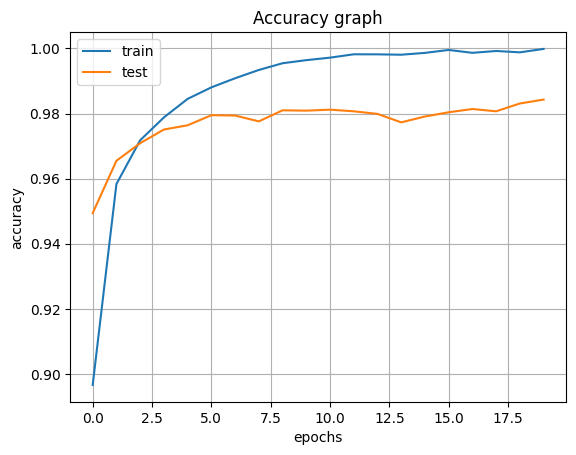

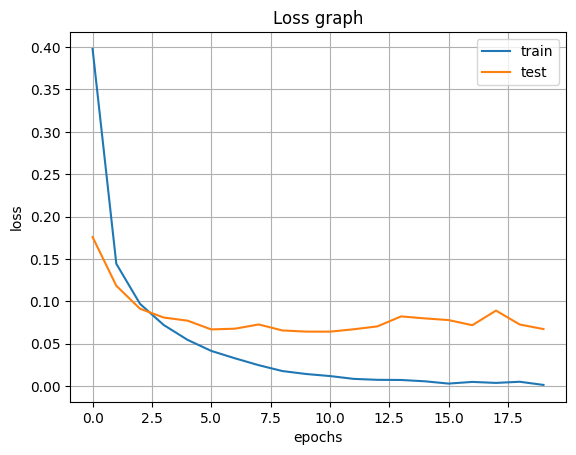

In [3]:
# 깊은 다층 퍼셉트론으로 MNIST 인식하기
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(784,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test), verbose=2)
print('Accuracy =', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

Epoch 1/50
391/391 - 13s - loss: 1.8152 - accuracy: 0.3519 - val_loss: 1.6582 - val_accuracy: 0.4119 - 13s/epoch - 32ms/step
Epoch 2/50
391/391 - 12s - loss: 1.6211 - accuracy: 0.4247 - val_loss: 1.5615 - val_accuracy: 0.4493 - 12s/epoch - 32ms/step
Epoch 3/50
391/391 - 12s - loss: 1.5383 - accuracy: 0.4563 - val_loss: 1.5317 - val_accuracy: 0.4600 - 12s/epoch - 32ms/step
Epoch 4/50
391/391 - 12s - loss: 1.4755 - accuracy: 0.4778 - val_loss: 1.4972 - val_accuracy: 0.4668 - 12s/epoch - 31ms/step
Epoch 5/50
391/391 - 12s - loss: 1.4257 - accuracy: 0.4931 - val_loss: 1.4568 - val_accuracy: 0.4793 - 12s/epoch - 31ms/step
Epoch 6/50
391/391 - 12s - loss: 1.3791 - accuracy: 0.5124 - val_loss: 1.4203 - val_accuracy: 0.4928 - 12s/epoch - 30ms/step
Epoch 7/50
391/391 - 11s - loss: 1.3414 - accuracy: 0.5265 - val_loss: 1.3653 - val_accuracy: 0.5139 - 11s/epoch - 29ms/step
Epoch 8/50
391/391 - 11s - loss: 1.3061 - accuracy: 0.5389 - val_loss: 1.3676 - val_accuracy: 0.5147 - 11s/epoch - 29ms/step


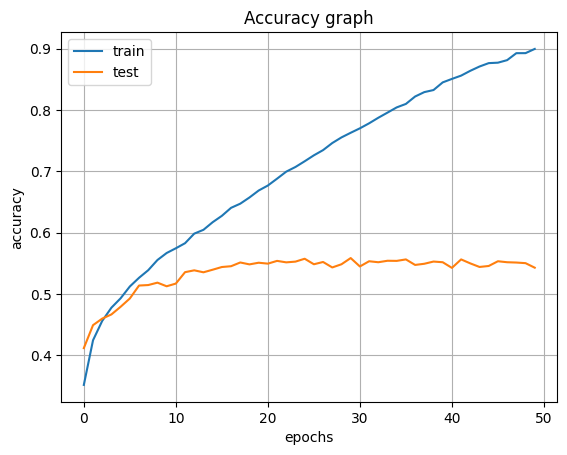

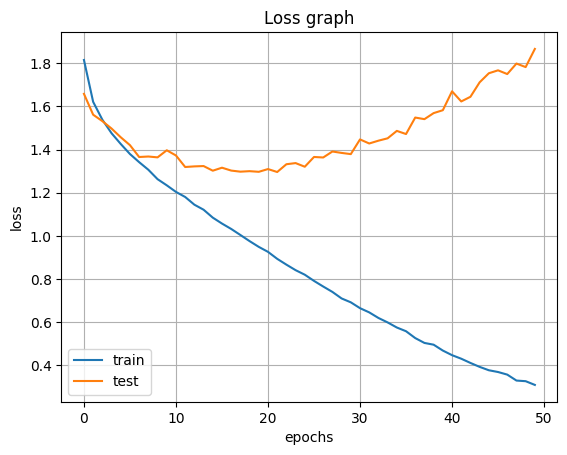

In [18]:
# 깊은 다층 퍼셉트론으로 CIFAR-10 인식하기
#import numpy as np
#import tensorflow as tf
#import tensorflow.keras.datasets as ds

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.reshape(-1,3072)
x_test = x_test.reshape(-1,3072)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist = dmlp.fit(x_train,y_train, batch_size=128, epochs=50, validation_data=(x_test,y_test), verbose=2)
print('Accuracy =', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

# [비전 에이전트 5] 우편번호 인식기 v.1

In [4]:
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
import winsound

model = tf.keras.models.load_model('dmlp_trained.h5')

def reset():
    global img
       
    img = np.ones((200,520,3), dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img, (10+i*100,50), (10+(i+1)*100,150), (0,0,255))
    cv.putText(img, 'e:erase s:show r:recognition q:quit', (10,40), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255,0,0), 1)

def grab_numerals():
    numerals=[]
    for i in range(5):
        roi = img[51:149, 11+i*100:9+(i+1)*100, 0]
        roi = 255 - cv.resize(roi, (28,28), interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    numerals = np.array(numerals)
    return numerals

def show():
    numerals = grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(numerals[i], cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
def recognition():
    numerals = grab_numerals()
    numerals = numerals.reshape(5, 784)
    numerals = numerals.astype(np.float32)/255.0
    res = model.predict(numerals)   # 신경망 모델로 예측
    class_id = np.argmax(res, axis=1)
    for i in range(5):
        cv.putText(img, str(class_id[i]), (50+i*100,180), cv.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 1)
    winsound.Beep(1000, 500)         # 비프음 발생
        
BrushSiz = 4
LColor = (0,0,0)

def writing(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x,y), BrushSiz, LColor, -1) 
    elif event == cv.EVENT_MOUSEMOVE and flags == cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img, (x,y), BrushSiz, LColor, -1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing', writing)

while(True):
    cv.imshow('Writing', img)
    key = cv.waitKey(1)
    if key == ord('e'):
        reset()
    elif key == ord('s'):
        show()
    elif key == ord('r'):
        recognition()
    elif key == ord('q'):
        break

cv.destroyAllWindows()

1/1 [==============================] - 0s 97ms/step
